# Task 1: Introduction

In [5]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

# Task 2: Dataset

Real estate agent table:

|Area|Distance|Price|
|---|---|---|
|70|3|21200|
|50|1|22010|
|120|9|24305|
|100|2|31500|

You can write the relationship with a 2-variable linear equation:

$
\begin{equation}
y = b + w_1.x_1 + w_2.x_2
\end{equation}
$

In a vector form:

$
\begin{equation}
y = b + (w_1 w_2).\binom{x_1}{x_2}
\end{equation}
$

Where
$
\begin{equation}
W = (w_1 w_2)
\end{equation}
$
and
$
\begin{equation}
X = \binom{x_1}{x_2}
\end{equation}
$

In [13]:
def generate_examples(num = 1000):
    W = [1.0, -3.0]
    b = 1.0
    
    W = np.reshape(W,(2,1))
    
    X = np.random.randn(num,2)
    
    y = b + np.dot(X,W) + np.random.randn()
    
    y = np.reshape(y, (num, 1))
    
    return X, y

In [14]:
X, y = generate_examples()

In [15]:
print(X.shape, y.shape)

(1000, 2) (1000, 1)


In [16]:
print(X[0],y[0])

[-0.3800811  0.2540054] [-0.42268829]


# Task 3: Initialize Parameters

The loss over **m** examples:

$
\begin{equation}
J = \frac{1}{2m} \sum_{i=1}^{m} (y - \hat{y})^2
\end{equation}
$

The objective of the gradient descent algorithm is to minimize this loss value.

Gradient Descent Objective is to 
$
\begin{equation}
min(J)
\end{equation}
$

In [17]:
class Model:
    def __init__(self, num_features):
        self.num_features = num_features
        self.W = np.random.randn(num_features,1)
        self.b = np.random.randn()

In [18]:
model = Model(2)
print(model.W)
print(model.b)

[[-0.60350301]
 [ 0.30212019]]
-1.6061987439325276


# Task 4: Forward Pass

The gradient descent algorithm can be simplified in 4 steps:

1. Get predictions y_hat for X with current values of W and b.
2. Compute the loss between y and y_hat
3. Find gradients of the loss with respect to parameters W and b
4. Update the values of W and b by subtracting the gradient values obtained in the previous step

Let's simplify our linear equation a bit more for an example:
$
\begin{equation}
y = wx
\end{equation}
$

Let's plot J as a function of w

![Loss vs Param](JvsW.png)

The gradients of loss with respect to w:

\begin{equation}
\frac{dJ}{dw} = \frac{\delta{J}}{\delta{w}} = \lim_{\epsilon \to 0} \frac{J(w + \epsilon) - J(w)}{\epsilon}
\end{equation}

In [19]:
class Model(Model):
    def forward_pass(self, X):
        y_hat = self.b + np.dot(X, self.W)
        return y_hat

In [20]:
y_hat = Model(2).forward_pass(X)
print(y_hat.shape)

#breakdown the logic
print(y_hat.shape[0])
print(y_hat[0])
print(X[0],y[0])

(1000, 1)
1000
[-0.12527974]
[-0.3800811  0.2540054] [-0.42268829]


# Task 5: Compute Loss

The loss over **m** examples:

$
\begin{equation}
J = \frac{1}{2m} \sum_{i=1}^{m} (y - \hat{y})^2
\end{equation}
$

In [21]:
class Model(Model):
    def compute_loss(self, y_hat, y_true):
        loss =  np.sum(np.square(y_hat - y_true))/(2*y_hat.shape[0])
        return loss

In [22]:
model = Model(2)
y_hat = model.forward_pass(X)
loss = model.compute_loss(y_hat, y)

In [23]:
loss

2.7612367692985456

# Task 6: Backward Pass

The gradient of loss with respect to bias can be calculated with:

$
\begin{equation}
\frac{dJ}{db} = \frac{1}{m} \sum_{i=1}^{m} (\hat{y^{(i)}} - y^{(i)})
\end{equation}
$

$
\begin{equation}
\frac{dJ}{dW_j} = \frac{1}{m} \sum_{i=1}^{m} (\hat{y^{(i)}} - y^{(i)}).x_j^{(i)}
\end{equation}
$

In [24]:
class Model(Model):
    def backward_pass(self, X, y_true, y_hat):
        m = y_true.shape[0]
        db = (1/m) * np.sum(y_hat - y_true)
        dW = (1/m) * np.sum(np.dot(np.transpose(y_hat - y_true), X), axis = 0)
        return dW,db

In [25]:
#Breakdown the logic

W1 = [1.0, -3.0]
W1 = np.reshape(W1,(1,2))
print(W1)
W2 = np.transpose(W1)
print(W2)

W3 = np.sum(W2)
print(W3)
W4 = np.sum(W2, axis = 0)
print(W4)

[[ 1. -3.]]
[[ 1.]
 [-3.]]
-2.0
[-2.]


In [26]:
model = Model(2)
X, y = generate_examples()
y_hat = model.forward_pass(X)

dW, db = model.backward_pass(X, y, y_hat)

In [27]:
print(dW, db)

[-0.31880964  4.89155222] 0.021266647328336646


In [28]:
print(X[0], y[0], y_hat[0])

#dW = (1/m) * np.sum(np.dot(np.transpose(y_hat - y_true), X), axis = 0)

X1 = np.transpose(y_hat - y)
#print(X1)
X2 = np.dot(X1, X)
print(X2)
X3 = np.sum(X2)
print(X3)
X4 = np.sum(X2, axis = 0)
print(X4)
print(np.reshape(X4,(2,1)))
print(0.003 * np.reshape(X4,(2,1)))
print(model.W)
print(model.W - 0.003 * np.reshape(X4,(2,1)))

[ 1.03891429 -1.99715067] [7.85212407] [-2.05783617]
[[-318.80963671 4891.55221713]]
4572.742580423846
[-318.80963671 4891.55221713]
[[-318.80963671]
 [4891.55221713]]
[[-0.95642891]
 [14.67465665]]
[[0.67845046]
 [1.83930243]]
[[  1.63487937]
 [-12.83535422]]


# Task 7: Update Parameters

In [29]:
class Model(Model):
    def update_params(self, dW, db, lr):
        self.W = self.W - lr * np.reshape(dW, (self.num_features,1))
        self.b = self.b - db

# Task 8: Training Loop

In [30]:
class Model(Model):
    def train(self, x_train, y_train, iterations, lr):
        losses = []
        for i in range(0, iterations):
            y_hat = self.forward_pass(x_train)
            loss = self.compute_loss(y_hat, y_train)
            dW, db = self.backward_pass(x_train, y_train, y_hat)
            self.update_params(dW, db, lr)
            losses.append(loss)
            if i%int(iterations/10) == 0:
                print('Iter: {}, Loss: {:.4f}'.format(i, loss))
        return losses
                

In [31]:
model = Model(2)

In [32]:
x_train, y_train = generate_examples()

In [33]:
print(3e-3)

0.003


In [34]:
losses = model.train(x_train, y_train, 1000, 3e-3)

Iter: 0, Loss: 1.5370
Iter: 100, Loss: 0.7238
Iter: 200, Loss: 0.4172
Iter: 300, Loss: 0.2405
Iter: 400, Loss: 0.1387
Iter: 500, Loss: 0.0800
Iter: 600, Loss: 0.0461
Iter: 700, Loss: 0.0266
Iter: 800, Loss: 0.0154
Iter: 900, Loss: 0.0089


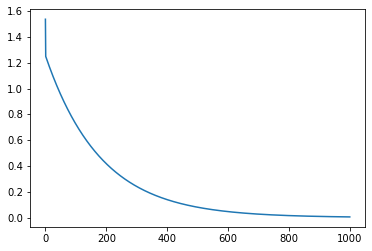

In [35]:
plt.plot(losses)

# Task 9: Predictions

In [36]:
model_untrained = Model(2)

x_test, y_test = generate_examples(500)
print(x_test.shape, y_test.shape)

(500, 2) (500, 1)


In [37]:
preds_untrained = model_untrained.forward_pass(x_test)
preds_trained = model.forward_pass(x_test)

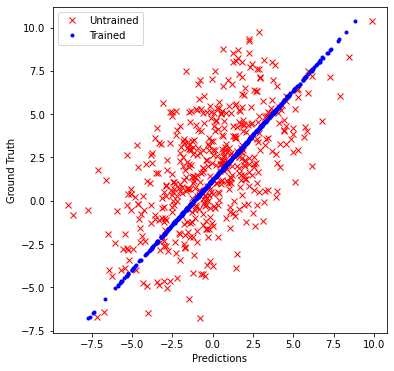

In [38]:
plt.figure(figsize = (6,6))
plt.plot(preds_untrained, y_test, 'rx', label = 'Untrained')
plt.plot(preds_trained, y_test, 'b.', label = 'Trained')
plt.legend()
plt.xlabel('Predictions')
plt.ylabel('Ground Truth')
plt.show()